### 5 main steps that are involved in training ML algorithm
1. Selection of features
2. Choosing a performance metric
3. Choosing a classifier and optimization algorithm
4. Evaluating the performance of the model
5. Tuning the algorithm

### Training a perceptron via Scikit-learn

In [1]:
from sklearn import datasets
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()

In [5]:
print iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

In [6]:
X = iris.data[:, [2,3]]
y = iris.target

In [7]:
# Return the different class labels stored in iris.target
np.unique(y)

array([0, 1, 2])

#### Split the dataset into separate training and test datasets

In [8]:
from sklearn.cross_validation import train_test_split

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Feature Scaling using standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- Using the preceding code, we loaded the **StandardScaler class** from the preprocessing module and initialized a new StandardScaler object that we assigned to the variable sc. Using the **fit method**, **StandardScaler** estimated the parameters **μ (sample mean) and  sigma (standard deviation)** for each feature dimension from the training data.

- By calling the transform method, we then standardized the training data using those estimated parameters μ and sigma . 

- Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

#### Train a perceptron model

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

#### Make Predictions via the predict method

In [14]:
y_pred = ppn.predict(X_test_std)

In [15]:
print 'Misclassified samples: %d' %(y_test != y_pred).sum()

Misclassified samples: 4


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print 'Accuracy: %.2f' % accuracy_score(y_test, y_pred)

Accuracy: 0.91


In [21]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx= None,  resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o','^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution ))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y =X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1,
                   marker='o', s=55, label='test set')

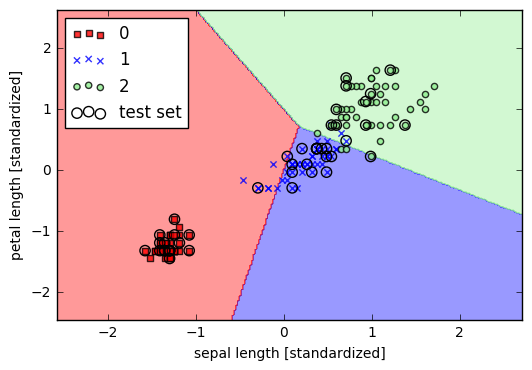

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, \
                      test_idx = range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression

### Training a logistic regression model with Scikit-learn

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

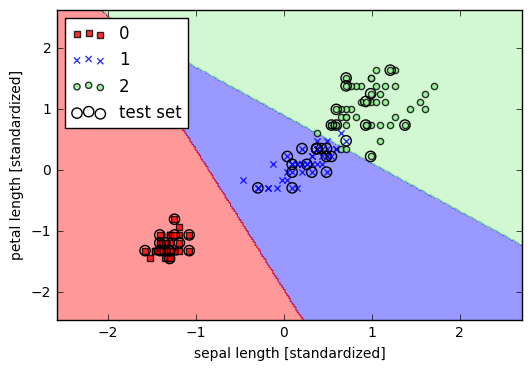

In [25]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, \
                      test_idx = range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [38]:
# Predict the class-membership probability of the samples via the predict_proba
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [39]:
from sklearn.svm import SVC

In [40]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

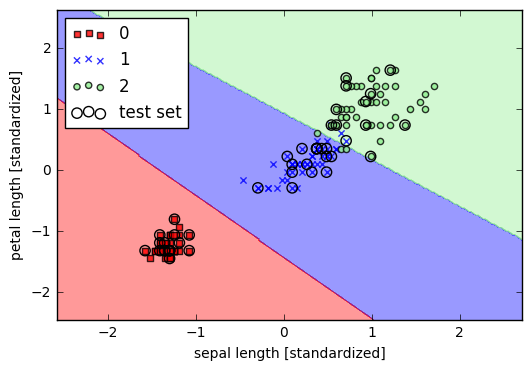

In [41]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, \
                      test_idx = range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression versus SVM
In practical classification tasks,
- Linear logistic regression and linear SVMs often yield very similar results.
- Logistic Regression tries to maximize the likelihoods of the training data, which makes it more prone to outliers than SVMs
- The SVMs mostly care about the points that are closest to the decision boundary(support vectors)
- Logistic Regression has the advantage that it is a simpler model that can be implemented more easily.
- Logistic Regression models can be easily updated, which is attractive when working with streaming data.


### Solving nonlinear problems using a kernel SVM
- Another reason why SVMs enjoy high popularity among ML practitioners is that they can be easily **kernelized** to solve nonlinear classification problems.



In [46]:
# Simple dataset that has the form of an XOR gate using the logical_xor
np.random.seed()
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
y_xor

array([-1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
        1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1])

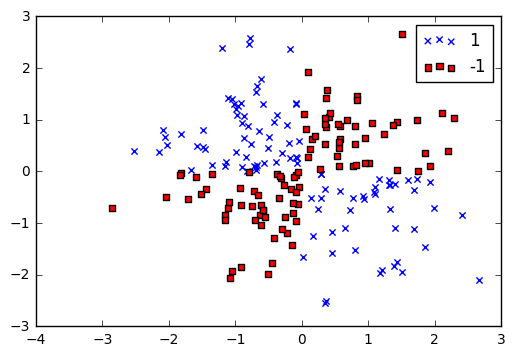

In [47]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

- Unable to separate samples from the positive and negative class very well using a linear hyperplane as the decision boundary
**Solution**
- The basic idea is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function where it becomes linearly separable
![alt text](nonlinear.JPG)
![alt text](hyper.JPG)

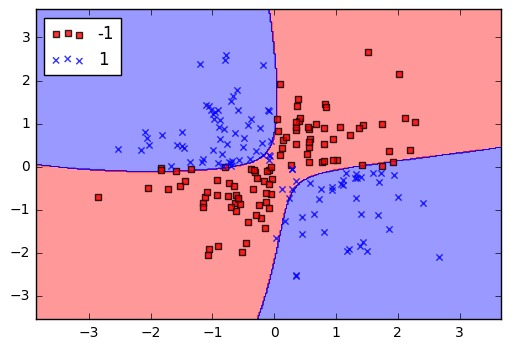

In [49]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

- The $\gamma$ parameter, which we set to gamma = 0.1, can be understood as a **cut-off** parameter for the Gaussian Sphere.
- If we increase the value for $\gamma$, we increase the influence or reach of the training samples, which leads to a softer decision boundary

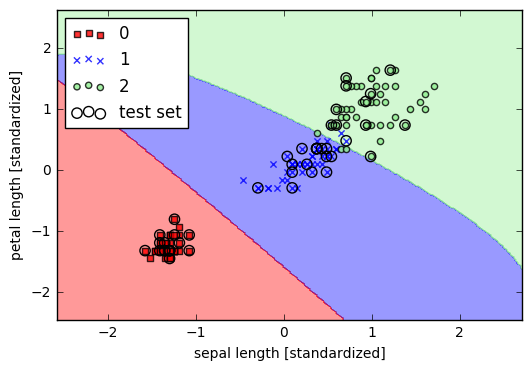

In [50]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

- Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data